In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# Loading the data again.


url = ("https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2013/results.csv")
df = pd.read_csv(url,delimiter=',',error_bad_lines=False) 

# providing more information per column on data types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
column type,object,int64,object,int64,object,object,object,float64,object,object,...,int64,float64,object,object,object,int64,object,object,object,object
null values (nb),0,0,0,0,0,0,0,0,0,15407,...,0,0,1463,0,0,0,0,0,1,0
null values (%),0,0,0,0,0,0,0,0,0,95.3168,...,0,0,9.05098,0,0,0,0,0,0.00618659,0


Things to do: 

1. fix data from object to int or float
2. EDA - visualizations of the runners 
3. What is the story? What do you want to focus the visualizations and analysis around?
4. How do k-means help show these relationships?
5. Key features?



In [3]:
#Show all columns in the dataset 
pd.set_option('display.max_columns', None)


In [4]:
df.head(7)

,25k,age,name,division,10k,gender,half,official,bib,ctz,country,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,CAN,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,KEN,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,ETH,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,AUS,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,JPN,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88
5,77.25,28,"Gebremariam, Gebregziabher",3,30.88,M,64.92,130.47,3,NaN,ETH,3,4.98,NaN,92.72,15.93,3,61.53,108.70,Tigray,123.78
6,50.50,42,"Soejima, Masazumi",6,18.73,M,41.98,90.02,W4,NaN,JPN,6,3.43,NaN,61.63,8.98,6,39.87,74.00,Fukuoka,84.67


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 21 columns):
25k          16164 non-null object
age          16164 non-null int64
name         16164 non-null object
division     16164 non-null int64
10k          16164 non-null object
gender       16164 non-null object
half         16164 non-null object
official     16164 non-null float64
bib          16164 non-null object
ctz          757 non-null object
country      16164 non-null object
overall      16164 non-null int64
pace         16164 non-null float64
state        14701 non-null object
30k          16164 non-null object
5k           16164 non-null object
genderdiv    16164 non-null int64
20k          16164 non-null object
35k          16164 non-null object
city         16163 non-null object
40k          16164 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 2.6+ MB


In [6]:
count_nan = len(df) - df.count()
count_nan

25k              0
age              0
name             0
division         0
10k              0
gender           0
half             0
official         0
bib              0
ctz          15407
country          0
overall          0
pace             0
state         1463
30k              0
5k               0
genderdiv        0
20k              0
35k              0
city             1
40k              0
dtype: int64

# Exploratory Data Analysis 

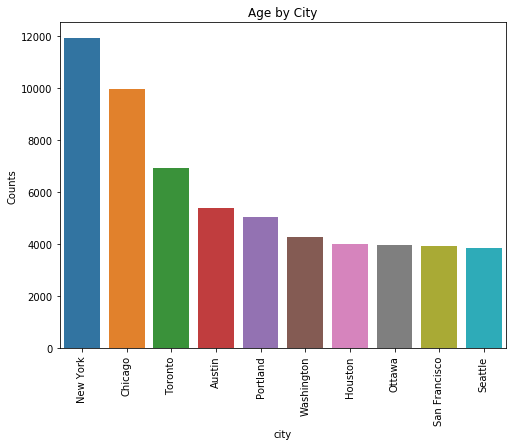

In [7]:
df_race = df[['city','age']].groupby(['city']).sum()
df_race = df_race['age'].sort_values(ascending=False)[:10]
df_race_keys = df_race.index
df_race_val = df_race.values
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = df_race_keys,y =df_race_val)
plt.title('Age by City')
plt.ylabel('Counts')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

New York city has the most amount of age (range) and runners that participated in the 2013 boston marathon. 

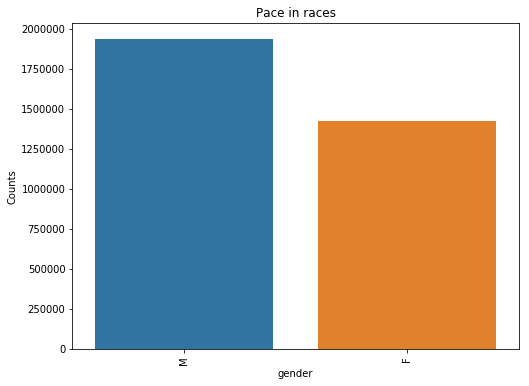

In [8]:
df_race = df[['gender','official']].groupby(['gender']).sum()
df_race = df_race['official'].sort_values(ascending=False)[:10]
df_race_keys = df_race.index
df_race_val = df_race.values
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = df_race_keys,y =df_race_val)
plt.title('Pace in races')
plt.ylabel('Counts')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

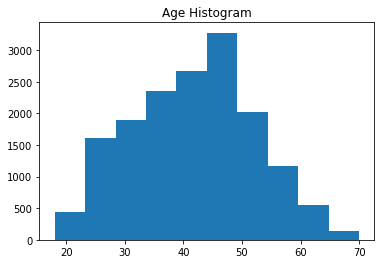

In [9]:
plt.hist(df.age, range= [18, 70])
plt.title('Age Histogram')
plt.show()

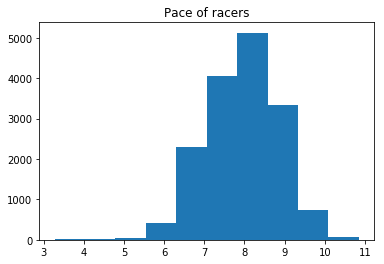

In [10]:
plt.hist(df.pace)
plt.title('Pace of racers')
plt.show()

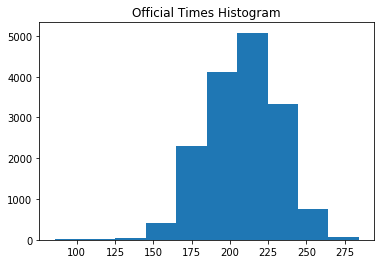

In [11]:
plt.hist(df.official)
plt.title('Official Times Histogram')
plt.show()

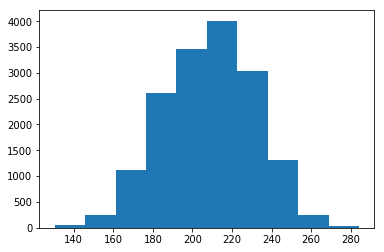

In [12]:
# Removing errors (no sub-2s yet, and definitely not at Boston...)
# Likely to be wheelchair racers
df = df.loc[df.official>130, :]

plt.hist(df.official)
plt.show()


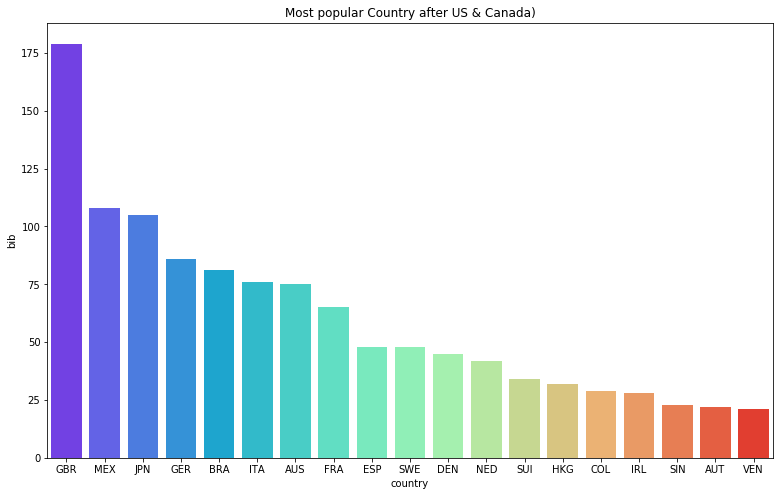

In [13]:
s = df.groupby('country').count()['bib'].sort_values(ascending=False).head(21)[2:]
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Most popular Country after US & Canada)");

Great Britian followed by Japan made up the most runners after Canada and the US. 

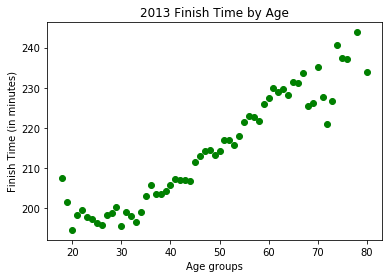

In [14]:
df_avg = df.groupby(['age'], as_index=False).mean()
plt.scatter(x = df_avg['age'], y = df_avg['official'],color = 'green')
plt.title('2013 Finish Time by Age') 
plt.xlabel('Age groups')
plt.ylabel('Finish Time (in minutes)');

The age groups between 20 - 30 are considerably faster then the rest of the runner population. Younger age and better atheletic ability and stamia. Between 40 and 65 as age increases so does the finish time. 

In [15]:
make_num = (['10k','25k','35k','30k','5k','half','20k','40k'])
for col in make_num:
    df[col]= df[col].str.replace('-', '')
    df[col] = pd.to_numeric(df[col])

In [16]:
df.fillna(0, inplace=True)

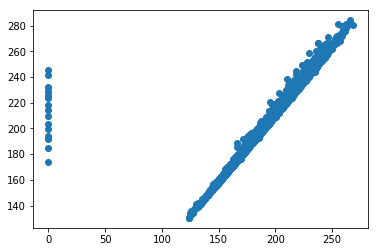

In [44]:
plt.scatter(y = df['official'], x = df['40k']);

In [18]:
drop = (['name','city','ctz','bib','state','country'])
make_dum = (['gender'])

In [19]:
df_dum = pd.get_dummies(df[make_dum])
df = pd.concat([df_dum, df], axis=1)
df['US'] = np.where(df['country'] == 'USA', 1, 0)
df = df.drop(drop,1)
df = df.drop(make_dum,1)

In [20]:
df = df.query('official >  0')  # remove people who do not finish

In [21]:
df.tail()

,gender_F,gender_M,25k,age,division,10k,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,US
16159,1,0,144.85,65,6,57.57,121.98,247.47,17014,9.45,174.75,28.50,6686,115.63,204.83,234.48,1
16160,0,1,133.32,64,258,52.80,112.27,229.72,13796,8.77,161.00,26.57,9024,106.38,189.82,217.88,1
16161,0,1,139.83,75,3,54.97,117.58,239.97,16083,9.17,168.82,27.48,9994,111.45,198.42,227.53,0
16162,0,1,135.38,80,1,53.13,113.80,233.90,14768,8.93,164.02,26.93,9434,107.85,192.80,221.42,1
16163,1,0,144.95,61,49,57.57,121.55,249.15,17144,9.52,175.82,28.93,6762,115.32,206.67,235.85,1


In [22]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

X = df
# Normalize the data.
X_norm = normalize(X)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2 = train_test_split(
    X_norm,
    test_size=0.5,
    random_state=None)
X1, X2 = train_test_split(
    X_half1,
    test_size=0.5,
    random_state=None)
X3, X4  = train_test_split(
    X_half2,
    test_size=0.5,
    random_state=None)

# K-means

In [23]:
n_clusters = (2,4,6,10,20,30,50)
for n in n_clusters:
    print("Number of estimated clusters: {}".format(n))
    for sample in [X1, X2, X3, X4]:
        model = KMeans(n_clusters=n, random_state=None).fit(sample)
        labels = model.labels_
        print(metrics.silhouette_score(sample, labels, metric='euclidean'))

Number of estimated clusters: 2
0.5216308747401411
0.5174677195354112
0.529660617579785
0.5156779536526613
Number of estimated clusters: 4
0.6360241803401051
0.6299776363740264
0.6362260344260868
0.6274301089802617
Number of estimated clusters: 6
0.5368001958897971
0.46459518695654084
0.5458370805556976
0.534092950261014
Number of estimated clusters: 10
0.5409830995298812
0.530884636786385
0.5194539458757101
0.5203233720242822
Number of estimated clusters: 20
0.4907100789445001
0.48829891622209054
0.4840051548420285
0.48284656250565944
Number of estimated clusters: 30
0.4696652346434356
0.4687117645027963
0.4795395656837024
0.47267149338781655
Number of estimated clusters: 50
0.48683256271302633
0.49140763694561607
0.4847563863495452
0.4877158683505789


In [24]:
# use 10
model = KMeans(n_clusters=10, random_state=None).fit(X1)
labels = model.labels_
print(metrics.silhouette_score(X1, labels, metric='euclidean'))
print(labels)

0.5397112258373606
[3 3 5 ... 2 8 3]


# Mean - Shift

In [25]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [26]:
for sample in [X1, X2, X3, X4]:
    bandwidth = estimate_bandwidth(sample, quantile=0.2, n_samples=500)
    print("bandwidth: {}".format(bandwidth))
    #bandwidth = 0.3
    model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    model.fit(sample)
    labels = model.labels_
    cluster_centers = model.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    print("Number of estimated clusters: {}".format(n_clusters_))
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

bandwidth: 0.18468413167282524
Number of estimated clusters: 5
0.6316295823291379
bandwidth: 0.1984636853509396
Number of estimated clusters: 5
0.6258264105401901
bandwidth: 0.17439524080671337
Number of estimated clusters: 6
0.6372359086530063
bandwidth: 0.18865123822676924
Number of estimated clusters: 4
0.6274482863767548


The k-means did a better job. 

In [32]:
df.count()


gender_F     16122
gender_M     16122
25k          16122
age          16122
division     16122
10k          16122
half         16122
official     16122
overall      16122
pace         16122
30k          16122
5k           16122
genderdiv    16122
20k          16122
35k          16122
40k          16122
US           16122
dtype: int64

# Spectral Clustering 

In [33]:
from sklearn.cluster import SpectralClustering

n_clusters = (2,4,6,10)  # took out 20, 30, 50 as this takes forever
for n in n_clusters:
    print("Number of estimated clusters: {}".format(n))
    for sample in [X1, X2, X3, X4]:
        sc = SpectralClustering(n_clusters=n)
        sc.fit(sample)
        labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

Number of estimated clusters: 2
0.6274482863767548
Number of estimated clusters: 4
0.6274482863767548
Number of estimated clusters: 6
0.6274482863767548
Number of estimated clusters: 10
0.6274482863767548


# Affinity propagation

In [34]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X1)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 2239


# Analysis of K-means

In [35]:
model = KMeans(n_clusters=10, random_state=None).fit(X_norm)
labels = model.labels_
#print(metrics.silhouette_score(sample, labels, metric='euclidean'))

df['clusters'] = labels

In [36]:
df.tail()

,gender_F,gender_M,25k,age,division,10k,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,US,clusters
16159,1,0,144.85,65,6,57.57,121.98,247.47,17014,9.45,174.75,28.50,6686,115.63,204.83,234.48,1,0
16160,0,1,133.32,64,258,52.80,112.27,229.72,13796,8.77,161.00,26.57,9024,106.38,189.82,217.88,1,6
16161,0,1,139.83,75,3,54.97,117.58,239.97,16083,9.17,168.82,27.48,9994,111.45,198.42,227.53,0,6
16162,0,1,135.38,80,1,53.13,113.80,233.90,14768,8.93,164.02,26.93,9434,107.85,192.80,221.42,1,6
16163,1,0,144.95,61,49,57.57,121.55,249.15,17144,9.52,175.82,28.93,6762,115.32,206.67,235.85,1,0


In [37]:
df_avg = df.groupby(['clusters'], as_index=False).mean()
print(df_avg)

   clusters  gender_F  gender_M         25k        age     division  \
0         0  1.000000  0.000000  131.054814  47.024768   528.596362   
1         1  0.000000  1.000000  100.026166  45.279141    87.435583   
2         2  0.000000  1.000000   98.561897  30.783046   648.500000   
3         3  0.014184  0.985816   84.494113  31.333333    39.737589   
4         4  0.000000  1.000000  106.991925  32.483218  2039.100197   
5         5  1.000000  0.000000  114.539777  34.182663   506.334365   
6         6  0.000000  1.000000  126.178484  51.748826  1152.248491   
7         7  1.000000  0.000000  126.809552  31.938489  2480.816784   
8         8  0.000000  1.000000  112.760604  47.534998   577.262103   
9         9  0.000000  1.000000   91.926438  31.399142   174.811159   

         10k        half    official       overall      pace         30k  \
0  51.654048  109.931633  230.084899  13576.121517  8.783700  159.272841   
1  39.852331   84.290491  172.350368   1058.423313  6.581350  120.

In [38]:
df_avg.sort_values(by='official')

,clusters,gender_F,gender_M,25k,age,division,10k,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,US
3,3,0.014184,0.985816,84.494113,31.333333,39.737589,33.456738,71.108156,146.683688,64.134752,5.602057,102.307234,16.759362,58.070922,67.444752,120.523546,138.436454,0.765957
9,9,0.000000,1.000000,91.926438,31.399142,174.811159,36.833863,77.864893,159.229657,260.094421,6.081416,111.387253,18.460258,241.180258,73.850687,130.823219,150.466867,0.849785
2,2,0.000000,1.000000,98.561897,30.783046,648.500000,39.282960,82.932874,170.302198,864.830460,6.503563,119.014943,19.621681,816.839080,78.757672,139.913132,161.012040,0.852011
1,1,0.000000,1.000000,100.026166,45.279141,87.435583,39.852331,84.290491,172.350368,1058.423313,6.581350,120.755491,19.992025,998.791411,79.930890,141.855552,162.932761,0.733129
4,4,0.000000,1.000000,106.991925,32.483218,2039.100197,42.496032,89.995094,189.484186,3844.991609,7.234842,129.860020,21.237034,3366.820829,85.271945,153.709062,178.409269,0.819348
8,8,0.000000,1.000000,112.760604,47.534998,577.262103,44.784252,94.893500,196.902149,5340.398397,7.518017,136.539732,22.373389,4520.064138,89.962902,161.176562,185.832186,0.759174
5,5,1.000000,0.000000,114.539777,34.182663,506.334365,45.626080,96.502378,197.923220,5551.117028,7.556793,138.430824,22.871139,863.057585,91.446755,162.952910,187.061882,0.860062
7,7,1.000000,0.000000,126.809552,31.938489,2480.816784,49.948199,106.280997,223.557975,11893.102373,8.534868,154.245294,25.030312,3750.380492,100.710962,182.578357,211.169521,0.899385
6,6,0.000000,1.000000,126.178484,51.748826,1152.248491,49.435597,105.673494,228.835842,13082.346747,8.736207,154.479634,24.659504,8672.648223,100.100744,184.240852,215.257153,0.776660
0,0,1.000000,0.000000,131.054814,47.024768,528.596362,51.654048,109.931633,230.084899,13576.121517,8.783700,159.272841,25.850043,4686.601006,104.193011,188.430704,217.199570,0.825851


Text(0.5,1,'Finish Times by Cluster')

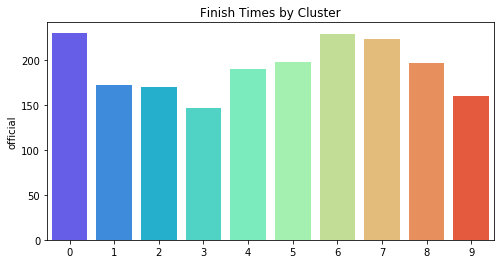

In [39]:
s = df.groupby(['clusters'], as_index=False).mean()['official']
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(8,4)
g.set_title("Finish Times by Cluster")

Finish times by clusters (9). The fastest cluster by finishing time was cluster 3. The slowest times were in cluster 0, 4, and 9. 

Text(0.5,1,'% of Females in each Cluster')

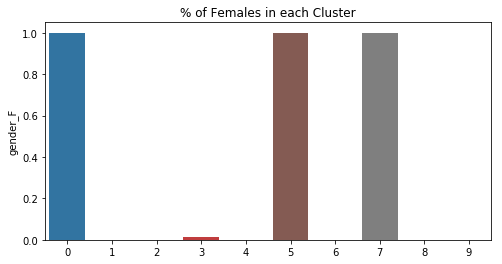

In [40]:
s = df.groupby(['clusters'], as_index=False).mean()['gender_F']
g = sns.barplot(s.index, s)
g.figure.set_size_inches(8,4)
g.set_title("% of Females in each Cluster")

The percentage of runners who were female per cluster. In clusters 0, 4, 5 had all female runners. Cluster 3 also the faster official time had less then 10% of females. 

Text(0.5,1,'% of Males in each Cluster')

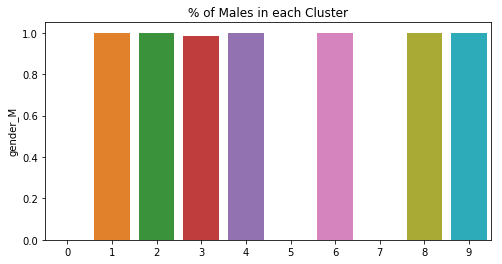

In [46]:
s = df.groupby(['clusters'], as_index=False).mean()['gender_M']
g = sns.barplot(s.index, s)
g.figure.set_size_inches(8,4)
g.set_title("% of Males in each Cluster")

The percentage of runners who are male in the race. 

Text(0.5,1,'Pace Cluster')

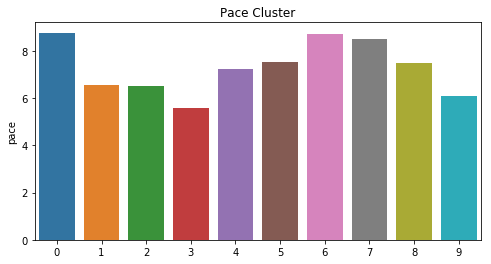

In [47]:
s = df.groupby(['clusters'], as_index=False).mean()['pace']
g = sns.barplot(s.index, s)
g.figure.set_size_inches(8,4)
g.set_title("Pace Cluster")

Showing the fastest pace by cluster grouping. 

Text(0.5,1,'40k times Cluster')

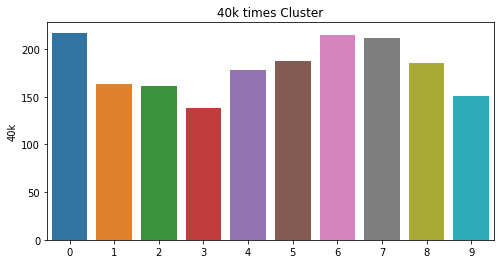

In [50]:
s = df.groupby(['clusters'], as_index=False).mean()['40k']
g = sns.barplot(s.index, s)
g.figure.set_size_inches(8,4)
g.set_title("40k times Cluster")

This is the 40k run times for the Boston Marathon. Note cluster 3 is much faster then the rest of the field. 

Text(0.5,1,'% US Cluster')

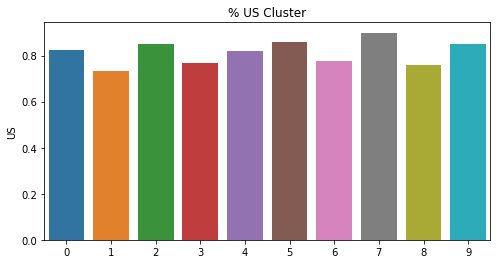

In [51]:
s = df.groupby(['clusters'], as_index=False).mean()['US']
g = sns.barplot(s.index, s)
g.figure.set_size_inches(8,4)
g.set_title("% US Cluster")

The percentage of runner who are US citizens. 

Text(0.5,1,'Ages by Cluster')

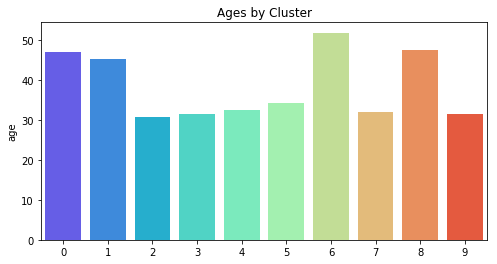

In [41]:
s = df.groupby(['clusters'], as_index=False).mean()['age']
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(8,4)
g.set_title("Ages by Cluster")

Clusters by ages. Clusters 0, 2, 7 and 9 all contained runners of over 45 years old. The faster official time (see above) cluster 3 mean was around 30. 

Text(0.5,1,'Division rank in each Cluster')

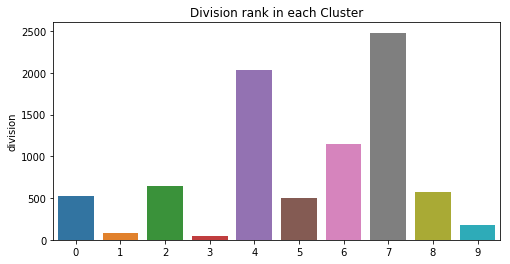

In [42]:
s = df.groupby(['clusters'], as_index=False).mean()['division']
g = sns.barplot(s.index, s)
g.figure.set_size_inches(8,4)
g.set_title("Division rank in each Cluster")

The division rank by cluster. In this plot clusers 4, 6, and 9 contain the highest number of divisions. Cluster 3 which had the fastest official time also has the few number of divisions for runners. 

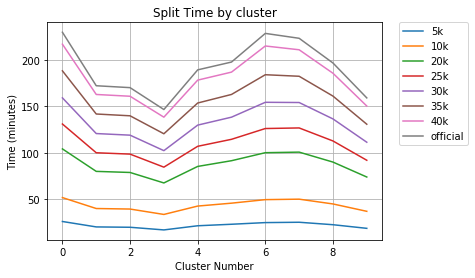

In [43]:
from pylab import *

t = df_avg['clusters']
s = df_avg['5k']
s2 = df_avg['10k']
s3 = df_avg['20k']
s4 = df_avg['25k']
s5 = df_avg['30k']
s6 = df_avg['35k']
s7 = df_avg['40k']
s8 = df_avg['official']
a = df_avg['age']
plot(t, s)
plot(t, s2)
plot(t, s3)
plot(t,s4)
plot(t,s5)
plot(t,s6)
plot(t,s7)
plot(t,s8)


xlabel('Cluster Number')
ylabel('Time (minutes)')
title('Split Time by cluster')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
grid(True)
show()

# Discussion


I selected the Boston Marathon 2013 data, I did not realize that I had selected the year of the Boston Maraton bombings. The bomb exploded at 2:49 pm with nearly 6,000 runners yet to finish (https://en.wikipedia.org/wiki/Boston_Marathon_bombing). Since 2005, the Boston Marathon as started at noon with the elite runners followed by the rest of the pack. At the time of the first explosion, the race clock at the finish line showed 04:09:43 (https://en.wikipedia.org/wiki/Boston_Marathon_bombing). Those who finished at this time were impacted by the explosion and likely did not finish. 

### Steps: 
To approach this data it needed to be cleaned up due to missing data. Once the dataset was cleaned I created dummy features for gender and categorizing people from the US vs. the rest of the world. 

In Line 22 Jupyter Notebook, I normalized the parameters and split the data into 4 samples.

### Cluster modeling 
I elevuated the clustering models by how well they assigned clusters within for the following models: K-means, Mean Shift, Spectral and Affinity. For k-means, it showed that 10 clusters gave me the best results. The other models did not perform as well. Affinity high computationally intensive and assigned over 2000+ clusters, far too many for this type of problem.  Spectral produced similar results to mean shift with 4 clusters near 0.63 %. 

The most descriptive measure of the clusters use k-means which assigned the data into 10 clusters. However, mean shift and spectral did have higher accuracy within both models. 


Interesting clusters: 

Cluster 3 - had the fastest official male and female times. These were the elite runners in the marathon. They also have the fastest pace time per mile about 1 minute less then the next group. This group was dominated by elite male runners, it did have female runners as well. Of all the cluster groupings cluster 3 had the fewest divisions suggesting the difficulty of being an elite runner is very selective. 

Clusters 1, 2, and 9 - that next tier of runners competing for fast run times. All of these clusters have very similar age, pace, official time, and division. All are dominated by male runners at 100%. 

Clusters 4, 5, and 8 - were all very similar in the official run times and pace during the marathon. However, the differences in that cluster 4 had over 2000 divisions of racers. Cluster 5, was 100% female racers. And cluster 8, the mean age was 50. So despite the similarities in the official race time there are so very meaningful differences in the type of runners. 

Clusters 0, 6, and 7 - these were the slowest official race times and slowest pace per mile. The main difference among these clusters was with age, gender, and division. Cluster 0, was an all female group of 40 and older. Cluster 6, quite similar except it was all male of 40 and older. Cluster 7, was all female group in 30's with nearly 2500 division of racers. 

Overall, cluster 3 assigned the fastest racers. 
 